Epoch: 0 Accuracy: 0.00%
Epoch: 1 Accuracy: 66.67%
Epoch: 2 Accuracy: 66.67%
Epoch: 3 Accuracy: 66.67%
Epoch: 4 Accuracy: 66.67%
Epoch: 5 Accuracy: 66.67%
Epoch: 6 Accuracy: 66.67%
Epoch: 7 Accuracy: 66.67%
Epoch: 8 Accuracy: 33.33%
Epoch: 9 Accuracy: 66.67%
Epoch: 10 Accuracy: 66.67%
Epoch: 11 Accuracy: 66.67%
Epoch: 12 Accuracy: 66.67%
Epoch: 13 Accuracy: 66.67%
Epoch: 14 Accuracy: 66.67%
Epoch: 15 Accuracy: 66.67%
Epoch: 16 Accuracy: 33.33%
Epoch: 17 Accuracy: 66.67%
Epoch: 18 Accuracy: 66.67%
Epoch: 19 Accuracy: 66.67%
Epoch: 20 Accuracy: 66.67%
Epoch: 21 Accuracy: 66.67%
Epoch: 22 Accuracy: 66.67%
Epoch: 23 Accuracy: 66.67%
Epoch: 24 Accuracy: 33.33%
Epoch: 25 Accuracy: 66.67%
Epoch: 26 Accuracy: 66.67%
Epoch: 27 Accuracy: 66.67%
Epoch: 28 Accuracy: 66.67%
Epoch: 29 Accuracy: 66.67%
Epoch: 30 Accuracy: 66.67%
Epoch: 31 Accuracy: 66.67%
Epoch: 32 Accuracy: 33.33%
Epoch: 33 Accuracy: 66.67%
Epoch: 34 Accuracy: 66.67%
Epoch: 35 Accuracy: 66.67%
Epoch: 36 Accuracy: 66.67%
Epoch: 37 Ac

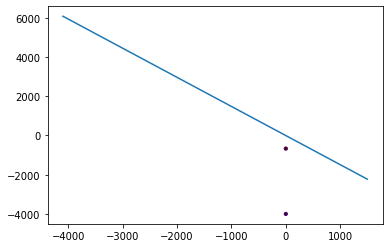

In [38]:
# Q1
import tensorflow as tf
import matplotlib.pyplot as plt
import generator
import math

batch_size = 500
gen = generator.gen(batch_size)
epochs = 1000

class perceptron:
    def __call__(self, x):  # predicting function
        return tf.reduce_sum(x * self.Weight, axis=-1) + self.Bias # For actual prediction, add tf.math.sign

    def __init__(self):
        self.Weight = tf.Variable(0.0, shape=tf.TensorShape(None))  # initialize m to any shape
        self.Bias = tf.Variable(0.0)

    def train(self, x, y, epoch_count):
        pred = self(x)
        signs = tf.math.sign(y*pred)
        positiveCount = tf.where(signs > 0.0).shape[0]
        negativeCountIndex = tf.where(signs <= 0.0).numpy()
        accuracy = positiveCount/signs.shape[0]*100
        # error = y[i] - pred[i]
        for i in negativeCountIndex:
            self.Weight.assign_add(x[i[0]] * y[i[0]])  # i is a tensor [0]
            self.Bias.assign_add(y[i[0]]) #  * self.Weight[1]
        print(f'Epoch: {epoch_count} Accuracy: {accuracy:.2f}%')
        return accuracy

model = perceptron()
x, y = next(gen)
x=tf.convert_to_tensor([[1, -665.6667], [1, -667.6667], [1, -4000.7] ], dtype=tf.float32)
y=tf.convert_to_tensor([1,-1,-1], dtype=tf.float32)
model.Weight.assign([0.0] * x.shape[-1])
for epoch_count in range(epochs):
    acc = model.train(x, y, epoch_count)
    if acc == 100:
        break
print(f'Weight: {model.Weight.numpy()}, Bias: {model.Bias.numpy()}')

plt.plot([-4100, 1500], [(-model.Weight[0]/model.Weight[1]) * -4100 + (-model.Bias/model.Weight[1]), (-model.Weight[0]/model.Weight[1]) * 1500 + (-model.Bias/model.Weight[1])])
plt.scatter(x[:,0], x[:,1], c=y, s=10)  # Plot some points only
plt.show()

Epoch: 0 Accuracy: 79.00% Loss: 81.80476379394531
Epoch: 1 Accuracy: 79.00% Loss: 81.34937286376953
Epoch: 2 Accuracy: 79.00% Loss: 80.91278076171875
Epoch: 3 Accuracy: 79.00% Loss: 80.47631072998047
Epoch: 4 Accuracy: 79.00% Loss: 80.03992462158203
Epoch: 5 Accuracy: 79.00% Loss: 79.60364532470703
Epoch: 6 Accuracy: 79.00% Loss: 79.16748809814453
Epoch: 7 Accuracy: 79.00% Loss: 78.73140716552734
Epoch: 8 Accuracy: 79.00% Loss: 78.29544067382812
Epoch: 9 Accuracy: 79.00% Loss: 77.85958099365234
Epoch: 10 Accuracy: 79.00% Loss: 77.42382049560547
Epoch: 11 Accuracy: 79.00% Loss: 76.98817443847656
Epoch: 12 Accuracy: 79.00% Loss: 76.5526351928711
Epoch: 13 Accuracy: 79.00% Loss: 76.11717987060547
Epoch: 14 Accuracy: 79.00% Loss: 75.68183135986328
Epoch: 15 Accuracy: 79.00% Loss: 75.24659729003906
Epoch: 16 Accuracy: 79.00% Loss: 74.81147003173828
Epoch: 17 Accuracy: 78.00% Loss: 74.39574432373047
Epoch: 18 Accuracy: 78.00% Loss: 74.0049819946289
Epoch: 19 Accuracy: 78.00% Loss: 73.6143722

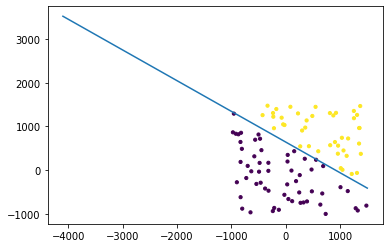

In [1]:
# Q2
import tensorflow as tf
import matplotlib.pyplot as plt
import generator
import math

batch_size = 100
gen = generator.gen(batch_size)
epochs = 500
regTerm = 5e-4
lr = 1e-4

class LinearClassifier:
    def __call__(self, x):  # predicting function
        return tf.reduce_sum(x * self.Weight, axis=-1) + self.Bias

    def __init__(self):
        self.Weight = tf.Variable(0.0, shape=tf.TensorShape(None))  # initialize m to any shape
        self.Bias = tf.Variable(0.0)

    def loss(self, y, pred):
        return tf.reduce_mean(tf.math.maximum(0, 1-y*pred) + regTerm * tf.norm(self.Weight, ord='euclidean')**2)  # tf.reduce_mean(max(0, 1-y*pred) + regTerm * tf.sqrt(self.Weight[0] ** 2 + self.Weight[1] ** 2) ** 2)

    def train(self, x, y, epoch_count, lr):
        pred = self(x)
        signs = tf.math.sign(y*pred)
        positiveCount = tf.where(signs > 0.0).shape[0]
        negativeCountIndex = tf.where(signs <= 0.0).numpy()
        accuracy = positiveCount/signs.shape[0]*100
        with tf.GradientTape(persistent=True) as t: # persistent=True is needed if assigning dy_dWeight, dy_dBias in 2 lines. Limits the times u can call it to once
            pred = self(x)
            current_loss = self.loss(y, pred)
        dy_dWeight, dy_dBias = t.gradient(current_loss, [self.Weight, self.Bias])
        # error = y[i] - pred[i]
        self.Weight.assign_sub(lr * dy_dWeight)
        self.Bias.assign_sub(dy_dBias * self.Weight[1])
        print(f'Epoch: {epoch_count} Accuracy: {accuracy:.2f}% Loss: {current_loss}')
        return accuracy

model = LinearClassifier()
x, y = next(gen)
# x=tf.convert_to_tensor([[1, -665.6667], [1, -667.6667], [1, -4000.7]], dtype=tf.float32)
# y=tf.convert_to_tensor([1,-1,-1], dtype=tf.float32)
model.Weight.assign([1.0] * x.shape[-1])
for epoch_count in range(epochs):
    acc = model.train(x, y, epoch_count, lr)
    if acc == 100:  # Early stopping
        break
print(f'Weight: {model.Weight.numpy()}, Bias: {model.Bias.numpy()}')

plt.plot([-4100, 1500], [(-model.Weight[0]/model.Weight[1]) * -4100 + (-model.Bias/model.Weight[1]), (-model.Weight[0]/model.Weight[1]) * 1500 + (-model.Bias/model.Weight[1])])
plt.scatter(x[:,0], x[:,1], c=y, s=10)  # Plot some points only
plt.show()